Python CVW GUI
=======

This notebook serves as a GUI front end for the Python 4200 Library.

Run the cell below to import all the necessary dependencies.

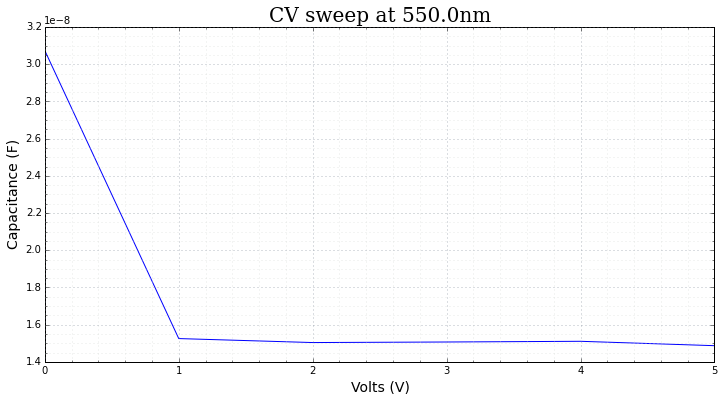

In [1]:
%matplotlib inline
from libs import Python_4200
from libs import ipynb4200
cv_test = Python_4200.cv_test("test")
ipynb4200.init_GUI(cv_test)